# 📊 Análise de Vendas – Northwind

Notebook referente a **Semana 2 – SQL Básico**, dentro da minha jornada de estudos em **Análise de Dados**.


## 🎯 Objetivo do Projeto

- Documentar análises de vendas realizadas em SQL
- Conectar métricas técnicas a perguntas de negócio
- Explorar volume de vendas, faturamento e comportamento temporal
- Criar um artefato claro, organizado e publicável no GitHub

## 📂 Fonte dos Dados

Os dados utilizados neste projeto foram extraídos do banco **Northwind**, a partir das seguintes tabelas:

- **orders**: informações gerais dos pedidos (cliente, data, frete)
- **order_details**: itens vendidos em cada pedido (produto, quantidade, preço e desconto)

As análises foram realizadas no **SQL Server**, e os resultados consolidados foram utilizados neste notebook para visualização e interpretação.

## 🧠 Perguntas de Negócio

Durante este projeto, buscamos responder às seguintes perguntas:

1. Qual produto foi o mais vendido (em quantidade)?
2. Qual cliente gastou mais no período analisado?
3. Qual mês apresentou o maior faturamento?

As respostas foram obtidas exclusivamente por meio de consultas SQL, utilizando JOINs e funções agregadas.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

In [14]:
# Importação do CSV com resultado da querie
df_produto = pd.read_csv("produto_mais_vendido.csv", sep=";")

df_produto.head()

,product_id,total_vendido
0,60,1577
1,59,1496
2,31,1397
3,56,1263
4,16,1158


## 🧪 Validação dos Dados – Produto Mais Vendido

Os dados abaixo representam o resultado direto da consulta SQL que agregou a quantidade total vendida por produto.

Antes de qualquer visualização, é importante validar:
- Estrutura das colunas
- Tipos de dados
- Ordenação dos valores

In [22]:
df_produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   product_id     77 non-null     int64
 1   total_vendido  77 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


In [16]:
# Top 10 Produtos Mais Vendidos
top_produtos = df_produto.head(10)

top_produtos

,product_id,total_vendido
0,60,1577
1,59,1496
2,31,1397
3,56,1263
4,16,1158
5,75,1155
6,24,1125
7,40,1103
8,62,1083
9,2,1057


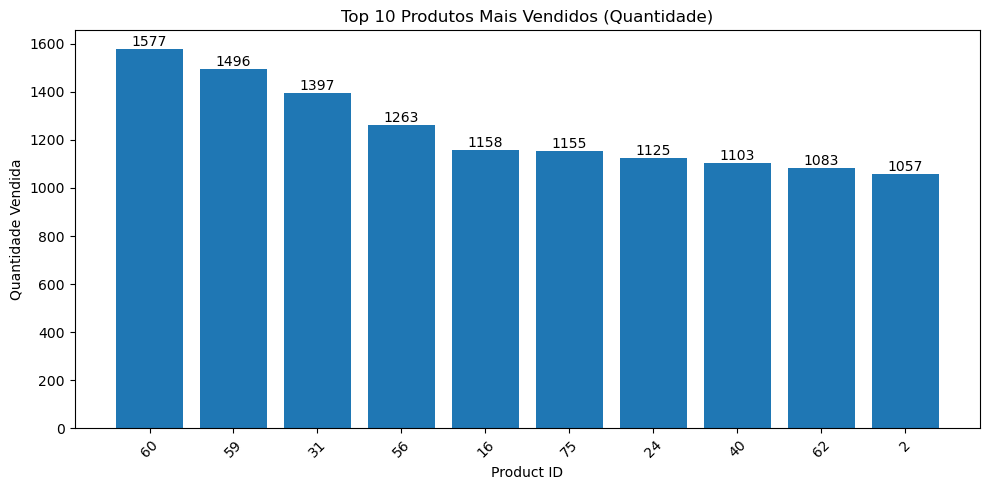

In [21]:
# Visualização: Top 10 Produtos
x = range(len(top_produtos))

bars = plt.bar(x, top_produtos["total_vendido"])

plt.title("Top 10 Produtos Mais Vendidos (Quantidade)")
plt.xlabel("Product ID")
plt.ylabel("Quantidade Vendida")
plt.xticks(x, top_produtos["product_id"], rotation=45)

# Adicionando rótulos de dados
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


## 📊 Análise – Produto Mais Vendido

A análise do volume de vendas por produto evidencia uma **concentração relevante do volume vendido em poucos itens** ao longo do período analisado.

O **produto de ID 60** destaca-se como o mais vendido, com **1.577 unidades**, seguido pelos produtos **59 (1.496 unidades)** e **31 (1.397 unidades)**. Esses três produtos lideram com folga o ranking de vendas em quantidade, indicando itens de **alta recorrência nos pedidos**.

De forma geral, os **10 produtos mais vendidos** apresentam volumes bastante próximos, variando entre **1.057 e 1.577 unidades**, o que sugere:

* Demanda consistente ao longo do tempo
* Produtos com presença frequente em diferentes pedidos
* Possível papel estratégico no mix de vendas da empresa

É importante destacar que esta análise considera **quantidade vendida**, e não faturamento. Produtos com alto volume de vendas podem não ser necessariamente os mais rentáveis, especialmente se apresentarem preços unitários mais baixos ou maiores descontos.

Do ponto de vista de negócio, esses resultados podem apoiar decisões relacionadas a:

* Priorização de estoque e reposição
* Identificação de produtos essenciais no portfólio
* Análises complementares de rentabilidade e margem

Uma análise adicional considerando **preço unitário e faturamento por produto** permitiria uma visão mais completa sobre o desempenho financeiro desses itens.

---
## 💰 Cliente que Mais Gastou

Nesta etapa, analisamos o faturamento total gerado por cliente ao longo de todo o período analisado.

A métrica utilizada é a **receita total**, calculada a partir da soma do produto entre quantidade e preço unitário dos itens vendidos em cada pedido.

In [2]:
# Importação do CSV com resultado da querie
df_cliente = pd.read_csv("cliente_mais_gastou.csv", sep=";")

df_cliente.head()

,customer_id,total_gasto
0,HUNGO,2646773.0
1,SAVEA,2590577.0
2,QUICK,2145024.0
3,ERNSH,1765344.0
4,RICSU,827020.0


In [23]:
# Validação da Estrutura
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  89 non-null     object 
 1   total_gasto  89 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [4]:
# Top 10 Clientes por Receita
top_clientes = df_cliente.head(10)

top_clientes

,customer_id,total_gasto
0,HUNGO,2646773.0
1,SAVEA,2590577.0
2,QUICK,2145024.0
3,ERNSH,1765344.0
4,RICSU,827020.0
5,FOLKO,811776.0
6,KOENE,769388.0
7,FRANK,763544.0
8,BERGS,611515.0
9,LEHMS,604052.0


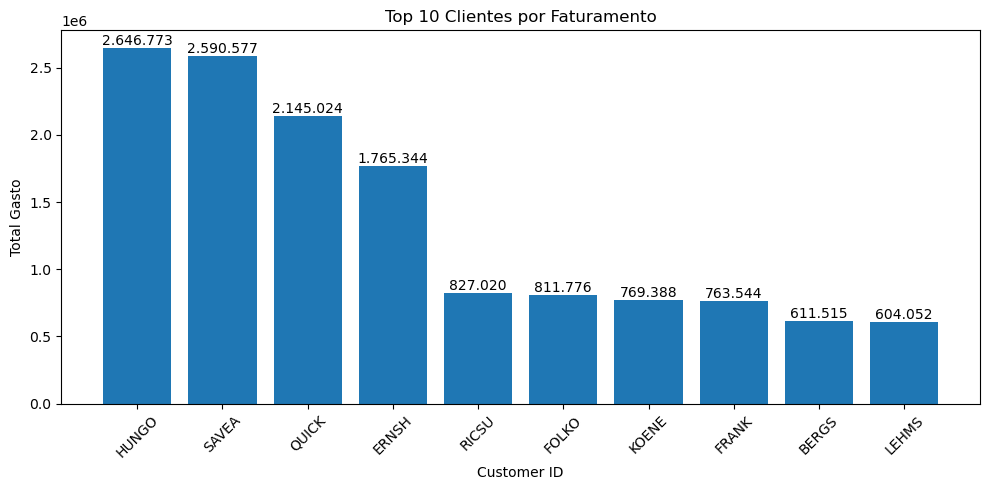

In [24]:
# Visualização: Top 10 Clientes
x = range(len(top_clientes))

plt.figure(figsize=(10, 5))
bars = plt.bar(x, top_clientes["total_gasto"])

plt.title("Top 10 Clientes por Faturamento")
plt.xlabel("Customer ID")
plt.ylabel("Total Gasto")

plt.xticks(x, top_clientes["customer_id"], rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,}".replace(",", "."),
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


## 📊 Análise – Clientes com Maior Faturamento

A análise de faturamento por cliente evidencia uma **alta concentração de receita em um grupo restrito de consumidores**, característica comum em cenários de e-commerce e vendas B2B.

O cliente **HUNGO** lidera o ranking com um faturamento total de **2.646.773**, seguido de perto por **SAVEA (2.590.577)** e **QUICK (2.145.024)**. Esses três clientes, sozinhos, representam uma parcela significativa do faturamento total do período analisado, indicando **alta recorrência de compras e/ou pedidos de maior valor agregado**.

Observa-se uma **queda relevante de faturamento** a partir do quarto colocado (**ERNSH – 1.765.344**), e uma diferença ainda mais acentuada entre o grupo líder e os demais clientes do ranking. Do quinto ao décimo colocado, o faturamento varia entre **604.052 e 827.020**, evidenciando um segundo grupo de clientes relevantes, porém com menor impacto financeiro individual.

Do ponto de vista de negócio, essa concentração sugere:

* Dependência de poucos clientes para geração de receita
* Oportunidade de estratégias específicas de **fidelização e retenção** dos principais clientes
* Potencial para ações comerciais direcionadas ao grupo intermediário, visando aumento de ticket médio ou frequência de compra

Essa análise reforça a importância de segmentar clientes não apenas por volume de pedidos, mas também por **contribuição financeira**, permitindo decisões mais assertivas nas áreas de vendas, marketing e relacionamento.

Uma análise complementar considerando **frequência de pedidos e valor médio por pedido** poderia aprofundar o entendimento do comportamento desses clientes.

---
## 📆 Faturamento por Mês

Nesta etapa, analisamos a evolução do faturamento ao longo do tempo, agregando as vendas por mês.

Essa análise permite identificar:
- Tendências de crescimento ou queda
- Meses com maior concentração de receita
- Possíveis padrões sazonais no comportamento de vendas

In [6]:
# Importação do CSV com resultado da querie
df_faturamento = pd.read_csv("faturamento_por_mes.csv", sep=";")

df_faturamento.head()

,mes,faturamento
0,1998-02,3440839.0
1,1998-04,2860012.0
2,1997-12,1957926.0
3,1998-01,1838718.0
4,1997-09,1747226.0


In [7]:
# Validação da Estrutura
df_faturamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mes          23 non-null     object 
 1   faturamento  23 non-null     float64
dtypes: float64(1), object(1)
memory usage: 500.0+ bytes


In [8]:
# Ordenação Temporal
df_faturamento["mes"] = pd.to_datetime(df_faturamento["mes"])
df_faturamento = df_faturamento.sort_values("mes")

df_faturamento

,mes,faturamento
21,1996-07-01,217096.0
20,1996-08-01,222921.0
22,1996-09-01,207915.0
18,1996-10-01,350314.0
16,1996-11-01,404016.0
15,1996-12-01,426419.0
13,1997-01-01,565687.0
17,1997-02-01,356812.0
19,1997-03-01,272134.0
7,1997-04-01,1312273.0


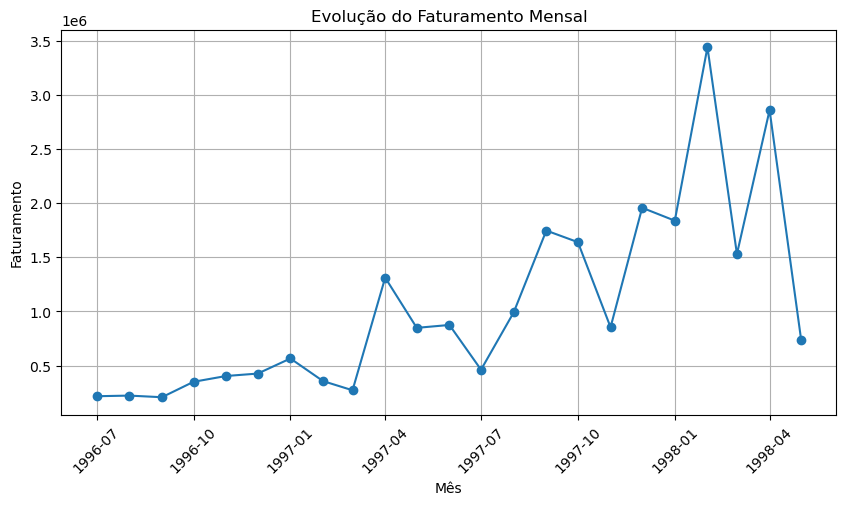

In [9]:
# Visualização: Faturamento ao Longo do Tempo
plt.figure()
plt.plot(df_faturamento["mes"], df_faturamento["faturamento"], marker="o")
plt.title("Evolução do Faturamento Mensal")
plt.xlabel("Mês")
plt.ylabel("Faturamento")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 📊 Análise – Evolução do Faturamento Mensal

A análise da evolução do faturamento mensal evidencia um **crescimento significativo ao longo do período analisado**, com aumento de escala do negócio e episódios claros de aceleração nas vendas.

No início da série, entre **julho e setembro de 1996**, o faturamento mensal manteve-se em um patamar relativamente estável, variando entre **207 mil e 223 mil**, indicando um estágio inicial de menor volume de vendas. A partir de **outubro de 1996**, observa-se um crescimento gradual e consistente, com destaque para os meses de **novembro e dezembro de 1996**, que já ultrapassam a marca de **400 mil**, sugerindo um aumento de demanda no final do ano.

Durante **1997**, o faturamento apresenta maior volatilidade, mas em um patamar significativamente superior ao ano anterior. Destacam-se picos relevantes em **abril de 1997 (1.312.273)**, **setembro de 1997 (1.747.226)**, **outubro de 1997 (1.640.185)** e, principalmente, **dezembro de 1997 (1.957.926)**, o maior faturamento mensal daquele ano, indicando possível efeito sazonal e consolidação do negócio.

O ano de **1998** inicia-se com faturamentos elevados, com destaque absoluto para **fevereiro de 1998**, que registra o **maior faturamento de toda a série (3.440.839)**. Esse pico sugere um evento específico, como aumento expressivo no volume de pedidos, contratos relevantes ou campanhas comerciais de alto impacto. Nos meses seguintes, embora o faturamento permaneça elevado, observa-se maior oscilação, com redução em **março (1.530.241)**, nova alta em **abril (2.860.012)** e queda em **maio (736.220)**, possivelmente influenciada por um período parcial ou encerramento do dataset.

Do ponto de vista de negócio, essa análise indica:

* Crescimento consistente do faturamento ao longo do tempo
* Presença de **sazonalidade**, especialmente em períodos de final de ano
* Meses específicos com picos que merecem investigação detalhada
* Importância do acompanhamento mensal para planejamento financeiro e projeções

Análises complementares considerando **quantidade de pedidos, ticket médio e campanhas comerciais** poderiam aprofundar o entendimento dos fatores que impulsionaram os picos de faturamento observados.

---
## 🧾 Conclusões Gerais

Ao longo deste projeto, foram analisados dados de vendas do dataset Northwind utilizando o SQL como principal ferramenta analítica, complementado por visualizações desenvolvidas em Python.

As análises realizadas permitiram responder perguntas de negócio fundamentais relacionadas a:
- Volume de vendas por produto
- Faturamento por cliente
- Evolução temporal das receitas

---
## 🔍 Principais Insights

- Um conjunto restrito de produtos concentra grande parte do volume de vendas, indicando itens estratégicos para o portfólio e para a gestão de estoque.
- Um pequeno grupo de clientes é responsável por uma parcela significativa do faturamento total, evidenciando alta concentração de receita e a importância de estratégias de fidelização e retenção.
- O faturamento mensal apresenta variações expressivas ao longo do tempo, com picos claros em determinados períodos, sugerindo a presença de sazonalidade e momentos de maior maturidade do negócio.

---
## 🧠 Aprendizados Técnicos

Este projeto consolidou conceitos fundamentais de SQL aplicados à análise de dados, incluindo:
- Uso de `JOINs` para relacionar tabelas normalizadas de forma correta
- Aplicação de funções agregadas (`COUNT`, `SUM`, `AVG`) para construção de métricas analíticas
- Transformação de dados transacionais em indicadores de negócio
- Integração de SQL com Python para visualização e interpretação dos resultados

O desenvolvimento do notebook reforça a importância de compreender o contexto e a granularidade dos dados antes de avançar para análises mais complexas.

---
## ✅ Encerramento

Este notebook representa a conclusão da **Semana 2 – SQL Básico** da jornada de estudos em Análise de Dados.

O projeto foi desenvolvido com foco em:
- Clareza analítica
- Boas práticas de SQL
- Documentação estruturada
- Criação de um material publicável para portfólio

Nas próximas etapas da jornada, o foco será a aplicação de **Python para Exploração de Dados**, aprofundando análises estatísticas e visuais em novos datasets.